## Constant Coefficient 

$$ ay'' + by' + cy = 0$$ where a, b, and c are constants.

In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.set_printoptions(threshold=np.inf)

In [3]:
matrix = np.zeros((128,128), dtype=float, order='C')
b = np.zeros(128)

With constant coefficients, solutions take the form of $y = e^{rx}$. Therefore
$$y=e^{rx} \: \Rightarrow \: y' = re^{rx} \: \Rightarrow \: y' = r^2e^{rx},$$
<br>
Where $y_i = e^{rx}$ is a solution only in the case where 
$$ar^2 + br + c = 0.$$
<br>
By utilizing the quadratic formula, two distinct, real roots, $r_1$ and $r_2$,  form the general solution
$$ y = c_1e^{r_1x} + c_2e^{r_2x}.$$
<br>
By Finite Difference methods
$$y' = \frac{y_{i+1} -y_{i}}{\Delta y},$$
<br>
$$y'' = \frac{y_{i+1}-2y_i +y_{i-1}}{\Delta y^2}.$$



Consider the equation $ y'' - y' - 2y = 0.$ 
<br>
By setting $y = e^{rx}$, the equation becomes $r^2 - r - 2 = 0.$
<br>
The roots of the quadratic are real and distinct, $r_1 = -1$ and $r_2 = 2$, so the general solution becomes
$$ y = c_1e^{-x} + c_2e^{2x}.$$

The discretized form
$$\frac{y_{i+1}-2y_i +y_{i-1}}{\Delta y^2} - \frac{y_{i+1} -y_{i}}{\Delta y} -2y_i = 0$$
which becomes
$$\left( \frac{1}{\Delta y^2}-\frac{1}{\Delta y} \right)y_{i+1}+\left( -\frac{2}{\Delta y^2}+\frac{1}{\Delta y}-2 \right)y_i + \left( \frac{1}{\Delta y^2} \right)y_{i-1} = 0$$

In [67]:
delta_y = 1.5/(len(matrix)-1)

In [68]:
for i in range(len(matrix)): 
    matrix[i,i] = -(2/delta_y**2 + 1/delta_y -2)
    matrix[i,i-1] = 1/delta_y**2

for i in range(len(matrix)-1):
     matrix[i,i+1] = 1/delta_y**2 - 1/delta_y

# Boundary Conditions
matrix[0,:] = 0
matrix[0,0] = 1

matrix[-1,:] = 0
matrix[-1,-1] = 1

b[0] = 1
b[-1] = 10

In [69]:
#matrix

In [70]:
#b

In [71]:
# Ax = b
x = np.linalg.solve(matrix, b)

In [72]:
linspace_x = np.linspace(0,10, len(matrix))
c2= (10-np.exp(-10))/(np.exp(-10)+np.exp(20))
c1 = 1-c2


In [73]:
c2

2.061144264815396e-08

In [74]:
y = c1*np.exp(-linspace_x) + c2*np.exp(2*linspace_x)

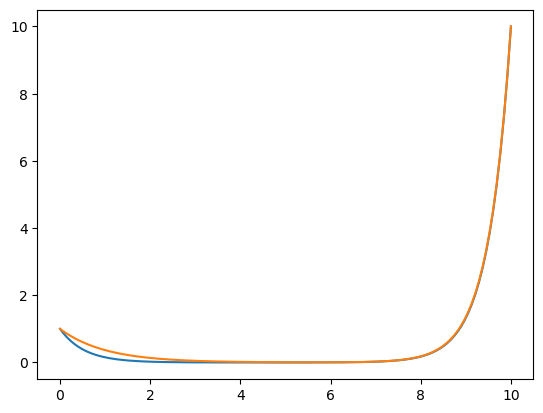

In [75]:
plt.plot(linspace_x, x)
plt.plot(linspace_x, y)
plt.show()